In [139]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
from sklearn import metrics

In [140]:
data=pd.read_csv('parolen.csv')
data.head()

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
0,1,1,33.2,1,5.5,18,0,4,0
1,0,1,39.7,1,5.4,12,0,3,0
2,1,2,29.5,1,5.6,12,0,3,0
3,1,1,22.4,1,5.7,18,0,1,0
4,1,2,21.6,1,5.4,12,0,1,0


In [141]:
data.shape

(738, 9)

In [142]:
data['state']=data['state'].astype(str)
data['crime']=data['crime'].astype(str)
data['race']=data['race'].astype(str)
#data['male']=data['male'].astype(str)



In [143]:
data.isnull().sum()

male                 0
race                 0
age                  0
state                0
time.served          0
max.sentence         0
multiple.offenses    0
crime                0
violator             0
dtype: int64

In [144]:
df=pd.get_dummies(data,drop_first=True)
df.head()

,male,age,time.served,max.sentence,multiple.offenses,violator,race_2,state_2,state_3,state_4,crime_2,crime_3,crime_4
0,1,33.2,5.5,18,0,0,0,0,0,0,0,0,1
1,0,39.7,5.4,12,0,0,0,0,0,0,0,1,0
2,1,29.5,5.6,12,0,0,1,0,0,0,0,1,0
3,1,22.4,5.7,18,0,0,0,0,0,0,0,0,0
4,1,21.6,5.4,12,0,0,1,0,0,0,0,0,0


In [233]:
x=df.drop(['violator','crime_2','age','crime_4','max.sentence','crime_3','state_2','male','state_3','time.served','race_2'],axis=1)
y=df['violator']

In [253]:
lor=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lor.fit(x_train,y_train)
pred_train=lor.predict(x_train)
pd.crosstab(y_train,pred_train)

col_0,0,1
violator,,
0,378,47
1,34,57


In [235]:
data.describe()

,male,age,time.served,max.sentence,multiple.offenses,violator
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,0.807588,34.694444,4.370867,12.886179,0.551491,0.191057
std,0.394462,10.293642,1.934807,3.164945,0.497679,0.393400
min,0.000000,17.900000,-4.900000,1.000000,0.000000,0.000000
25%,1.000000,25.600000,3.225000,12.000000,0.000000,0.000000
50%,1.000000,33.900000,4.400000,12.000000,1.000000,0.000000
75%,1.000000,42.875000,5.200000,15.000000,1.000000,0.000000
max,1.000000,67.000000,14.900000,18.000000,1.000000,1.000000


In [249]:
accuracy=(378+57)/x_train.shape[0]
print(accuracy)

0.8430232558139535


In [239]:
lor.fit(x_test,y_test)
pred_test=lor.predict(x_test)
pd.crosstab(y_test,pred_test)

col_0,0,1
violator,,
0,159,13
1,16,34


In [240]:
accuracy=(159+34)/x_test.shape[0]
print(accuracy)

0.8693693693693694


In [255]:
x2=add_constant(x_train)

logit=sm.Logit(y_train,x2)
result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.338115
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               violator   No. Observations:                  516
Model:                          Logit   Df Residuals:                      513
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Dec 2018   Pseudo R-squ.:                  0.2742
Time:                        14:19:04   Log-Likelihood:                -174.47
converged:                       True   LL-Null:                       -240.36
                                        LLR p-value:                 2.404e-29
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6720      0.202     -8.265      0.000      -2.068      -1.275
multiple

In [248]:
pred_train_proba=lor.predict_proba(x_train)
pred_test_proba=lor.predict_proba(x_test)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

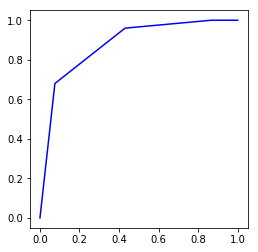

In [252]:
fpr,tpr,thershold=metrics.roc_curve(y_test,pred_test_proba[:,1])
plt.plot(fpr,tpr,label='ROC curve',color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [250]:
AUC=metrics.auc(fpr,tpr)
print(AUC)

0.8775581395348837
